# Binscatter Demo

Binscatter plots group the x-axis into bins and plot average outcomes for each bin. This is useful when you have large datasets with overplotting, want to visualize conditional means, or need to control for confounders.

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
from binscatter import binscatter

pio.renderers.default = "png"
pio.renderers["png"].scale = 4  # High resolution for GitHub

gapminder = px.data.gapminder()

np.random.seed(1)

# Simulated data with polynomial relationship
x = np.random.uniform(0, 10, 500)
poly_data = pd.DataFrame(
    {"x": x, "y": 2 + 0.5 * x + 0.3 * x**2 + np.random.normal(0, 2, 500)}
)

# Simulated confounded data
n = 300
group = np.repeat(["A", "B", "C"], n // 3)
group_effect = np.where(group == "A", 0, np.where(group == "B", 5, 10))
conf_x = np.random.normal(0, 1, n) + group_effect
conf_y = -0.5 * conf_x + 2 * group_effect + np.random.normal(0, 1, n)
confounded_data = pd.DataFrame({"x": conf_x, "y": conf_y, "group": group})

## 1. Basic Binscatter Plot

Let's start with a simple example: GDP per capita vs. Life Expectancy from the Gapminder dataset.

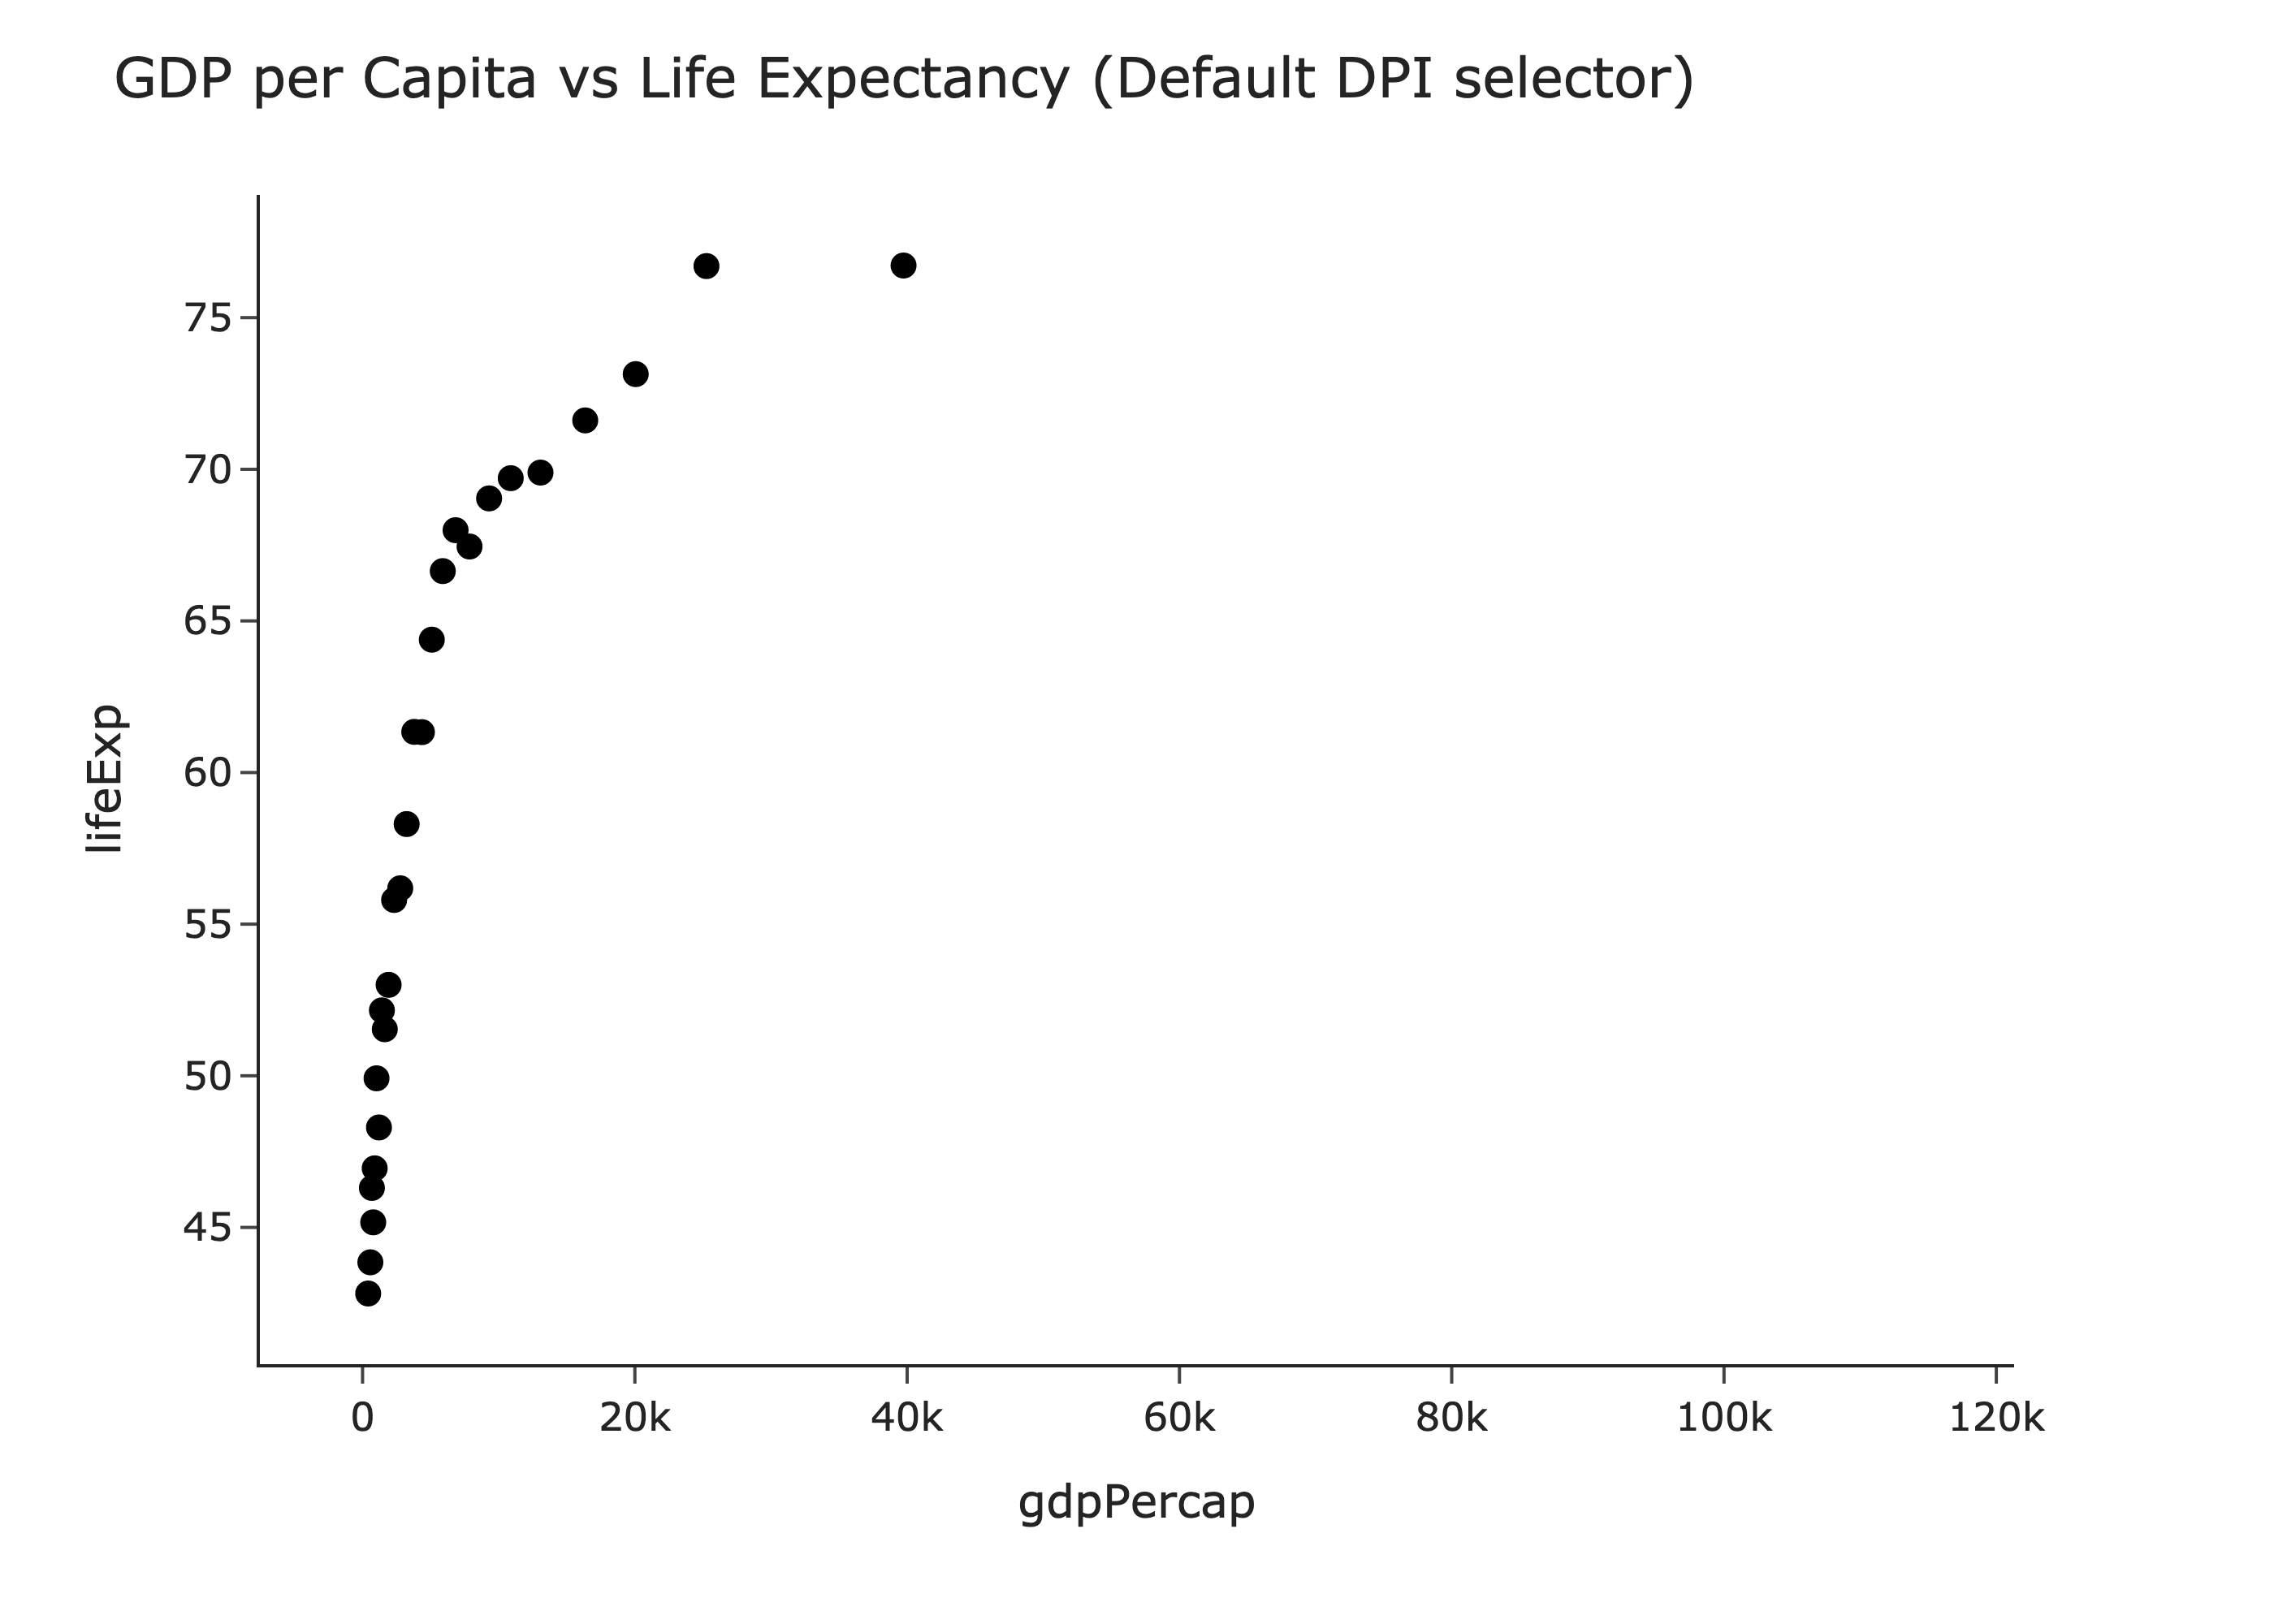

In [2]:
# Basic binscatter plot
fig = binscatter(gapminder, x="gdpPercap", y="lifeExp")
# fig is a Plotly figure, so we can use any available Plotly methods on it
fig.update_layout(title="GDP per Capita vs Life Expectancy (Default DPI selector)")
fig.show()

## 2. Automatic Bin Selection Methods

Binscatter supports two automatic bin selection methods:
- **DPI (Direct Plug-In)**: Default method, provides optimal bin count (shown above)
- **ROT (Rule-of-Thumb)**: Alternative automatic selector

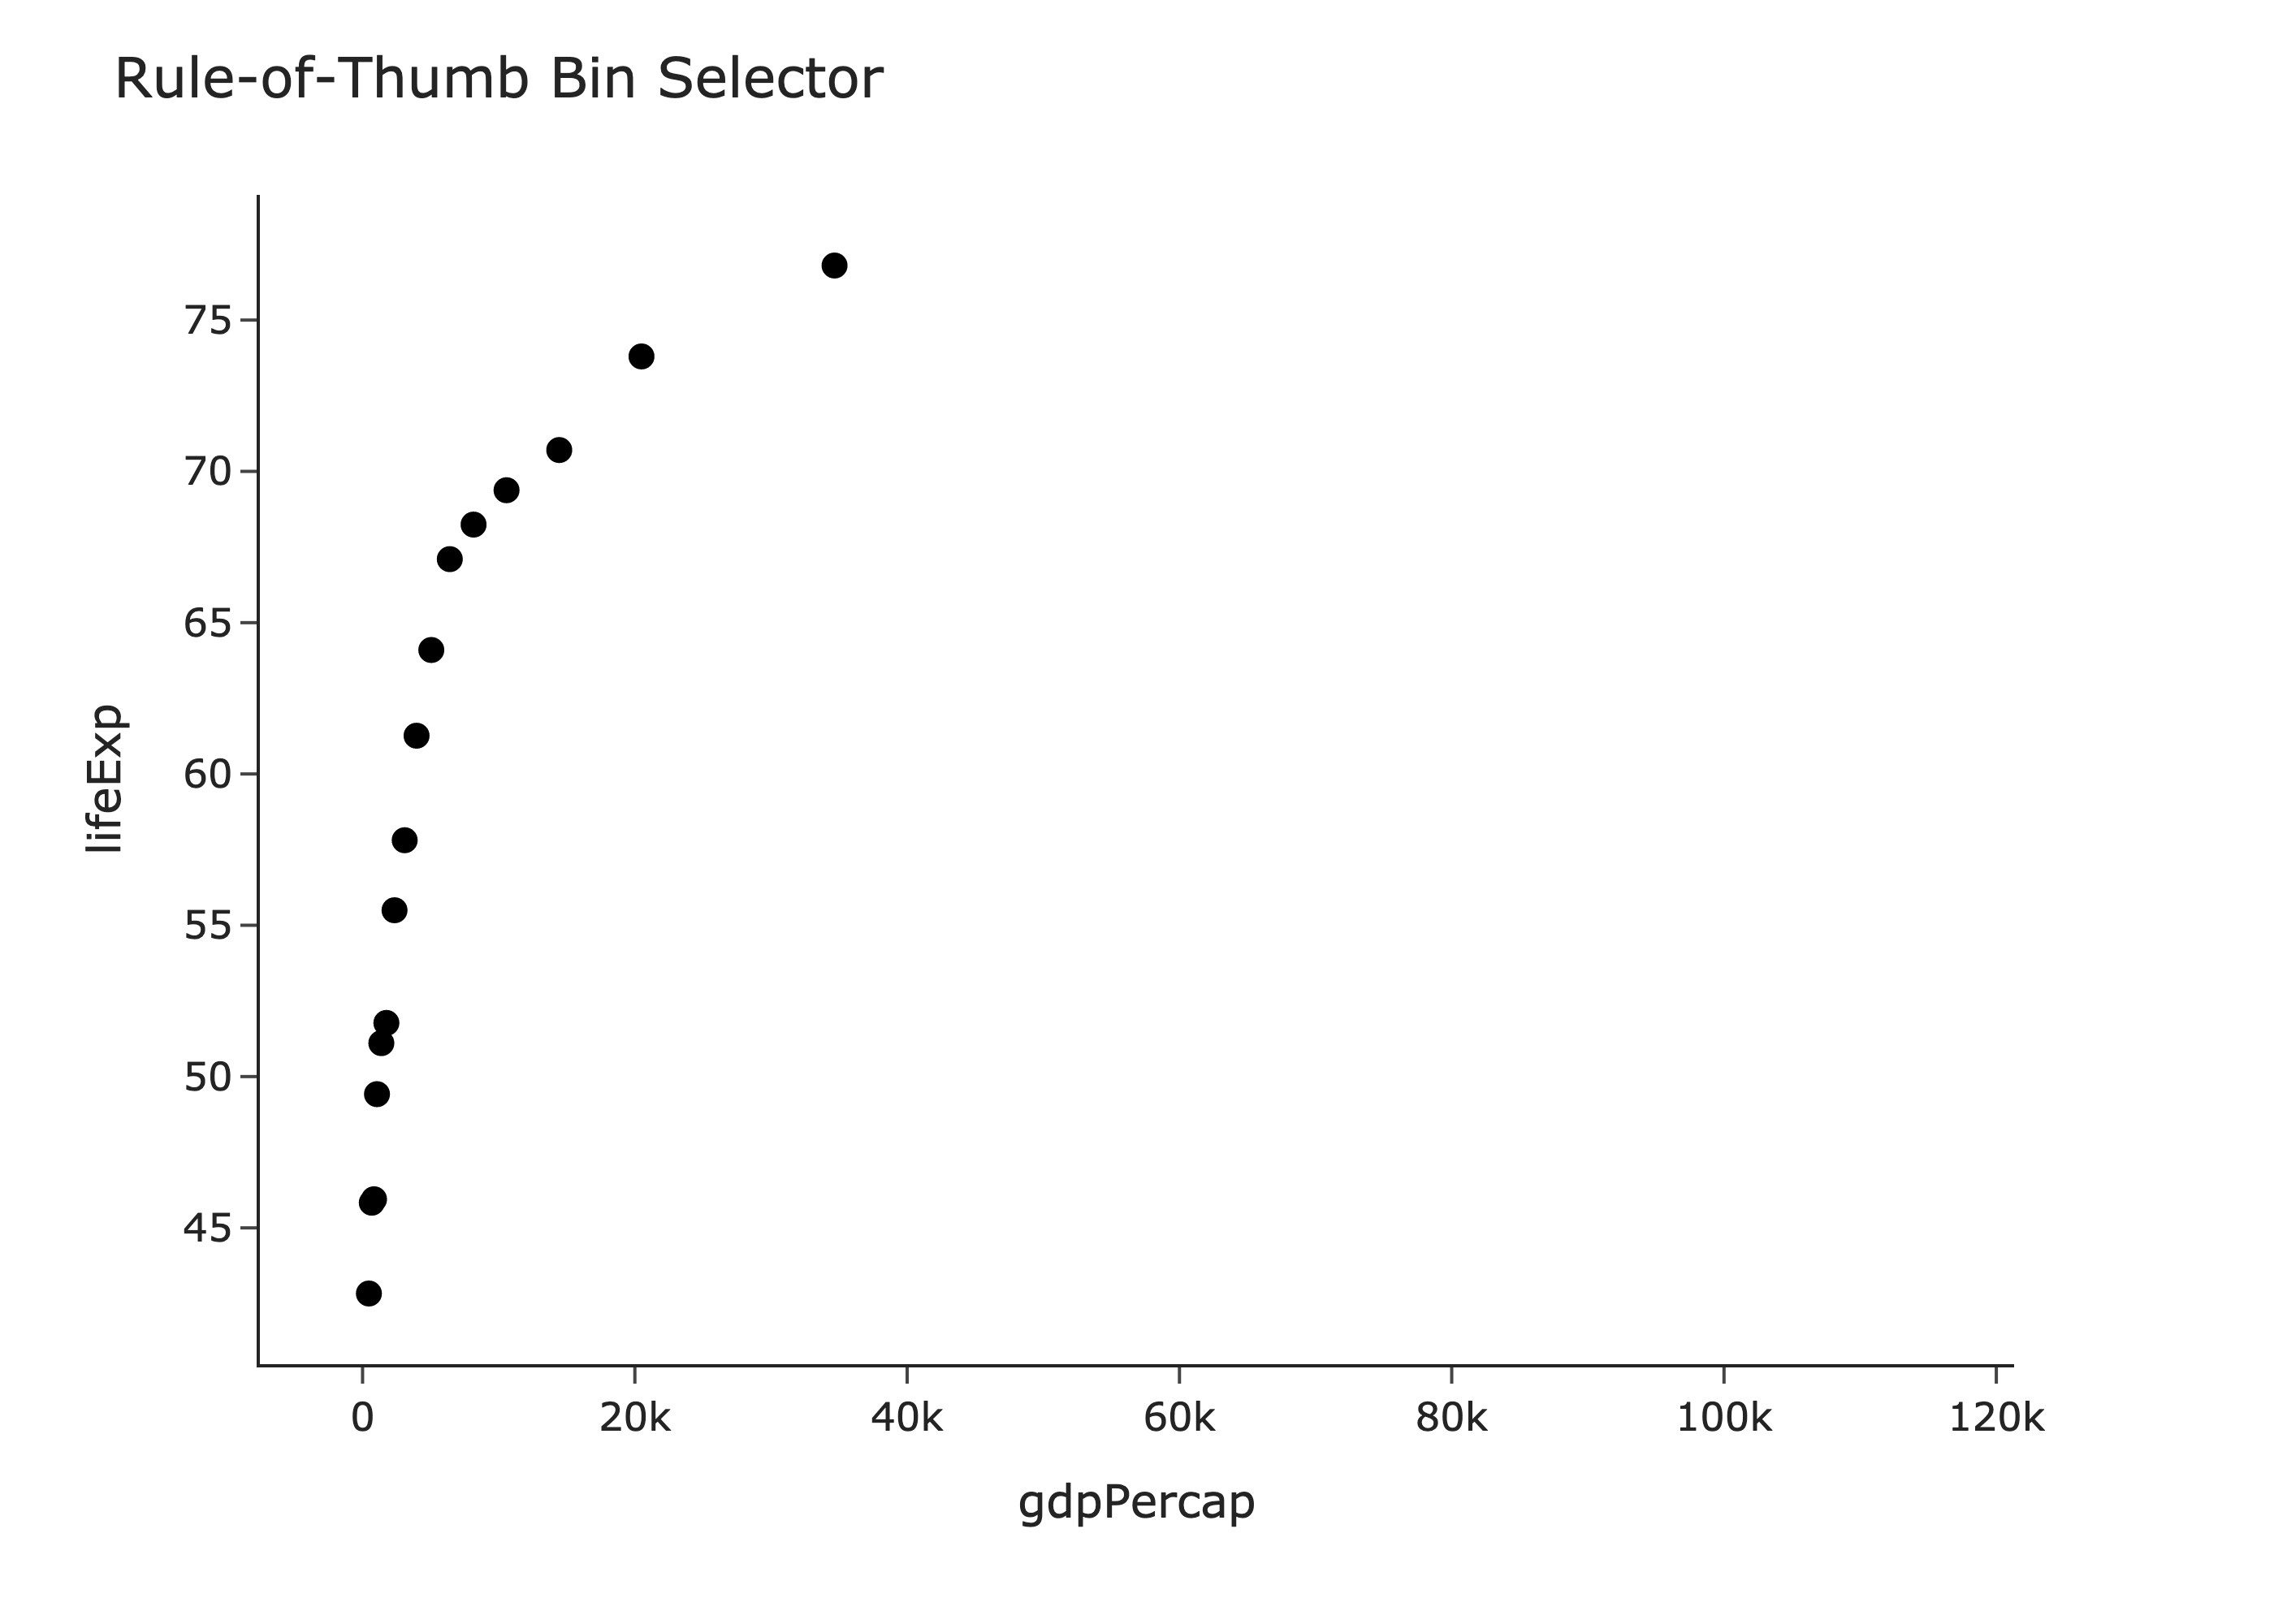

In [3]:
# Rule-of-thumb selector
fig_rot = binscatter(gapminder, x="gdpPercap", y="lifeExp", num_bins="rot")
fig_rot.update_layout(title="Rule-of-Thumb Bin Selector")
fig_rot.show()

## 3. Manual Bin Specification

You can manually specify the number of bins for more granular or coarser views.

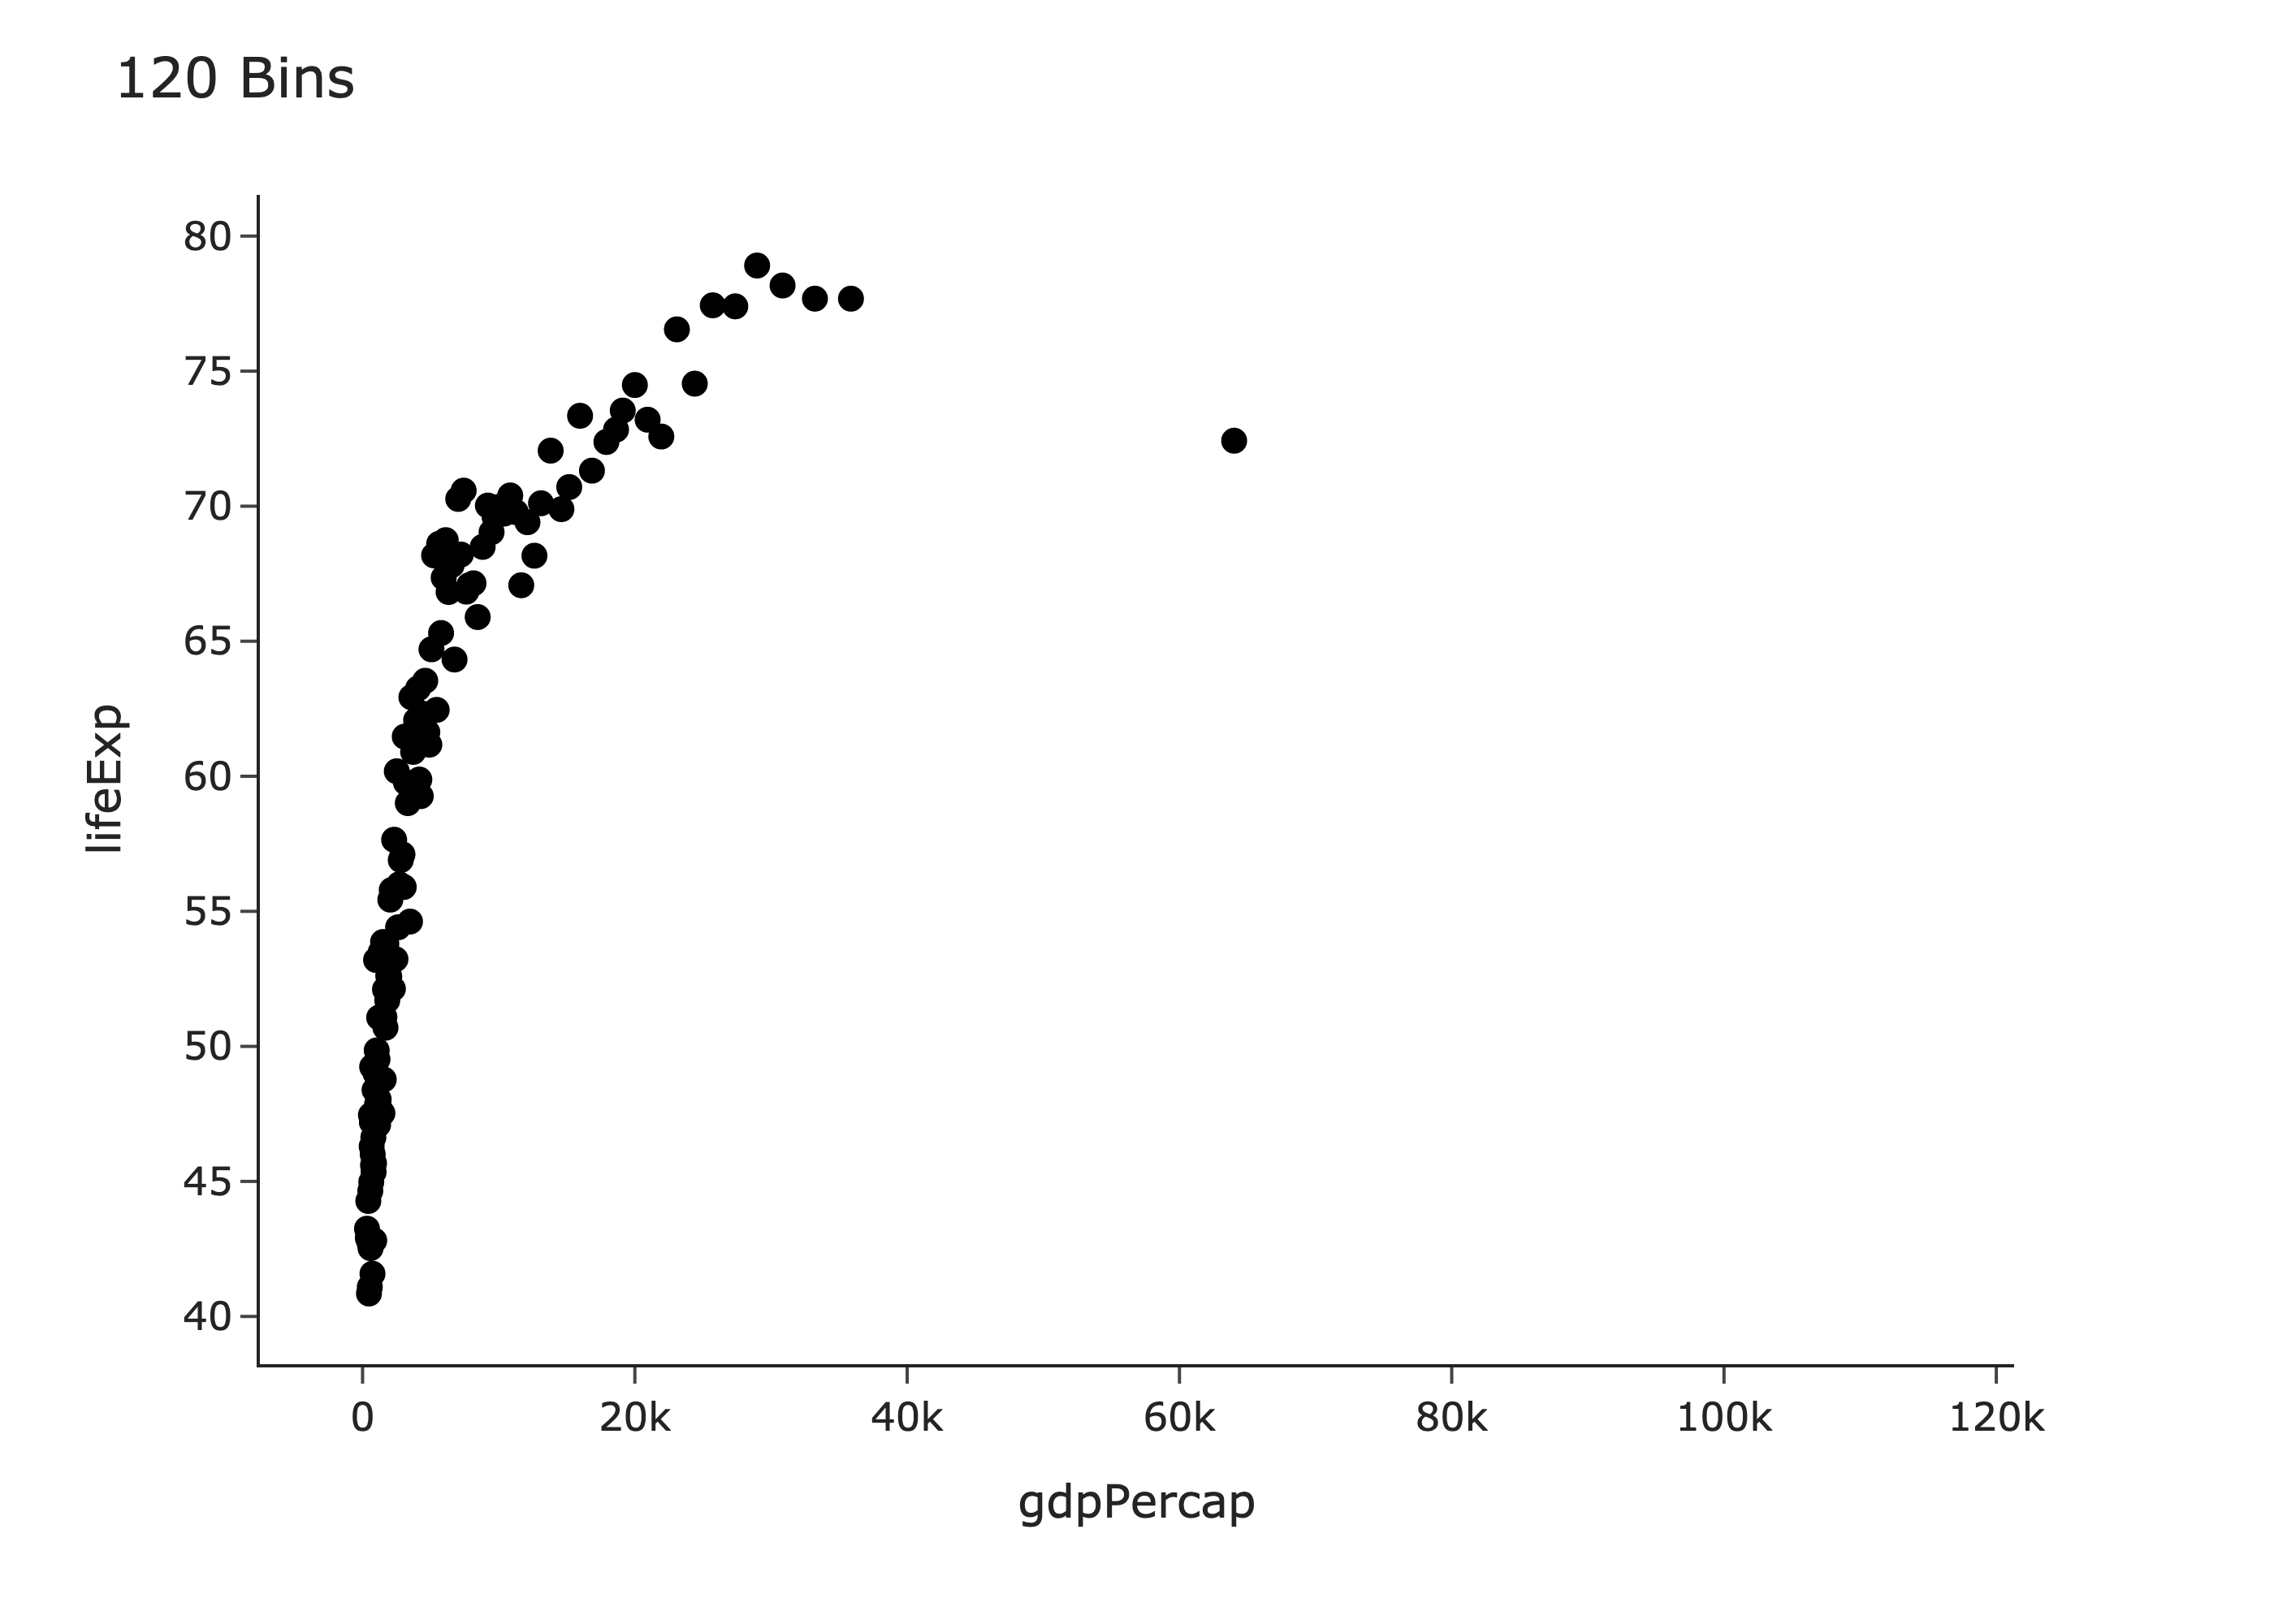

In [4]:
# Manual bin specification (120 bins)
fig_120 = binscatter(gapminder, x="gdpPercap", y="lifeExp", num_bins=120)
fig_120.update_layout(title="120 Bins")
fig_120.show()

## 4. Polynomial Overlay

Add polynomial fit lines to visualize the underlying trend.

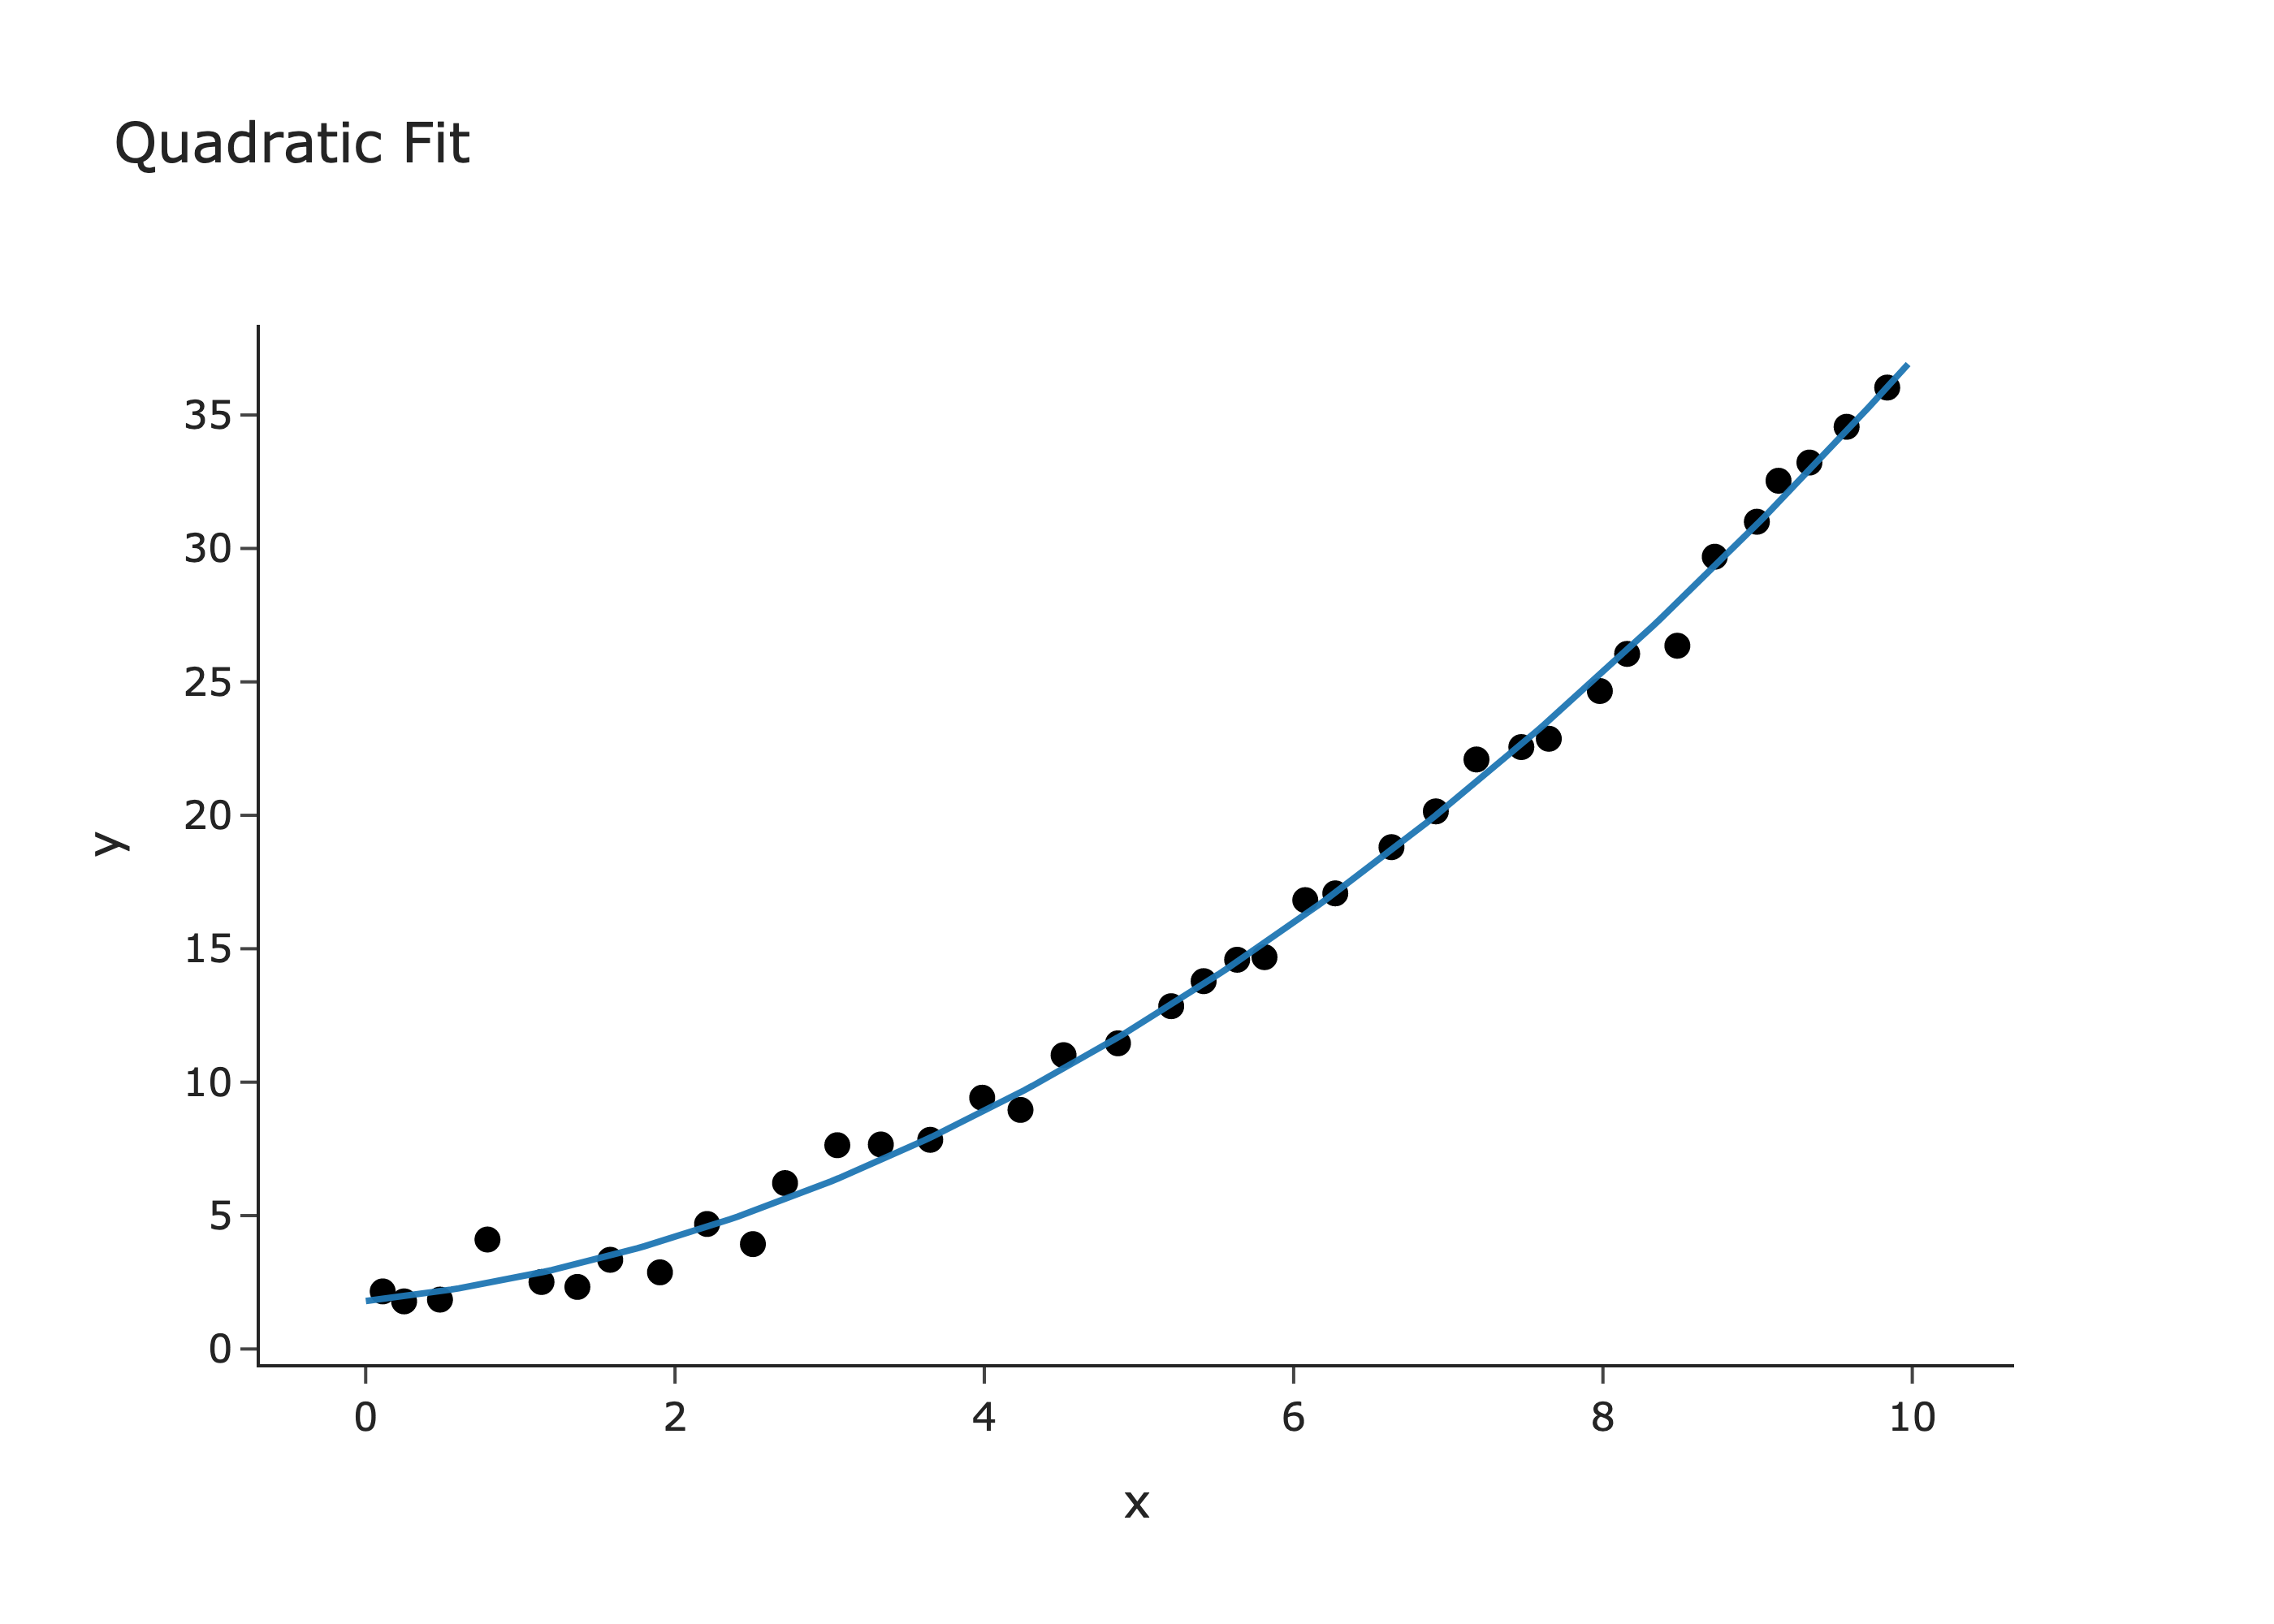

In [5]:
# Quadratic fit overlay
binscatter(poly_data, x="x", y="y", poly_line=2, title="Quadratic Fit").show()

## 5. Adjusting for Confounders

Binscatter can partial out control variables, showing the relationship between x and y after adjusting for confounders. Following the original paper, controls are evaluated at their mean level. Categorical controls are automatically handled via one-hot encoding.

Here we use `poly_line=1` to highlight the slope change.

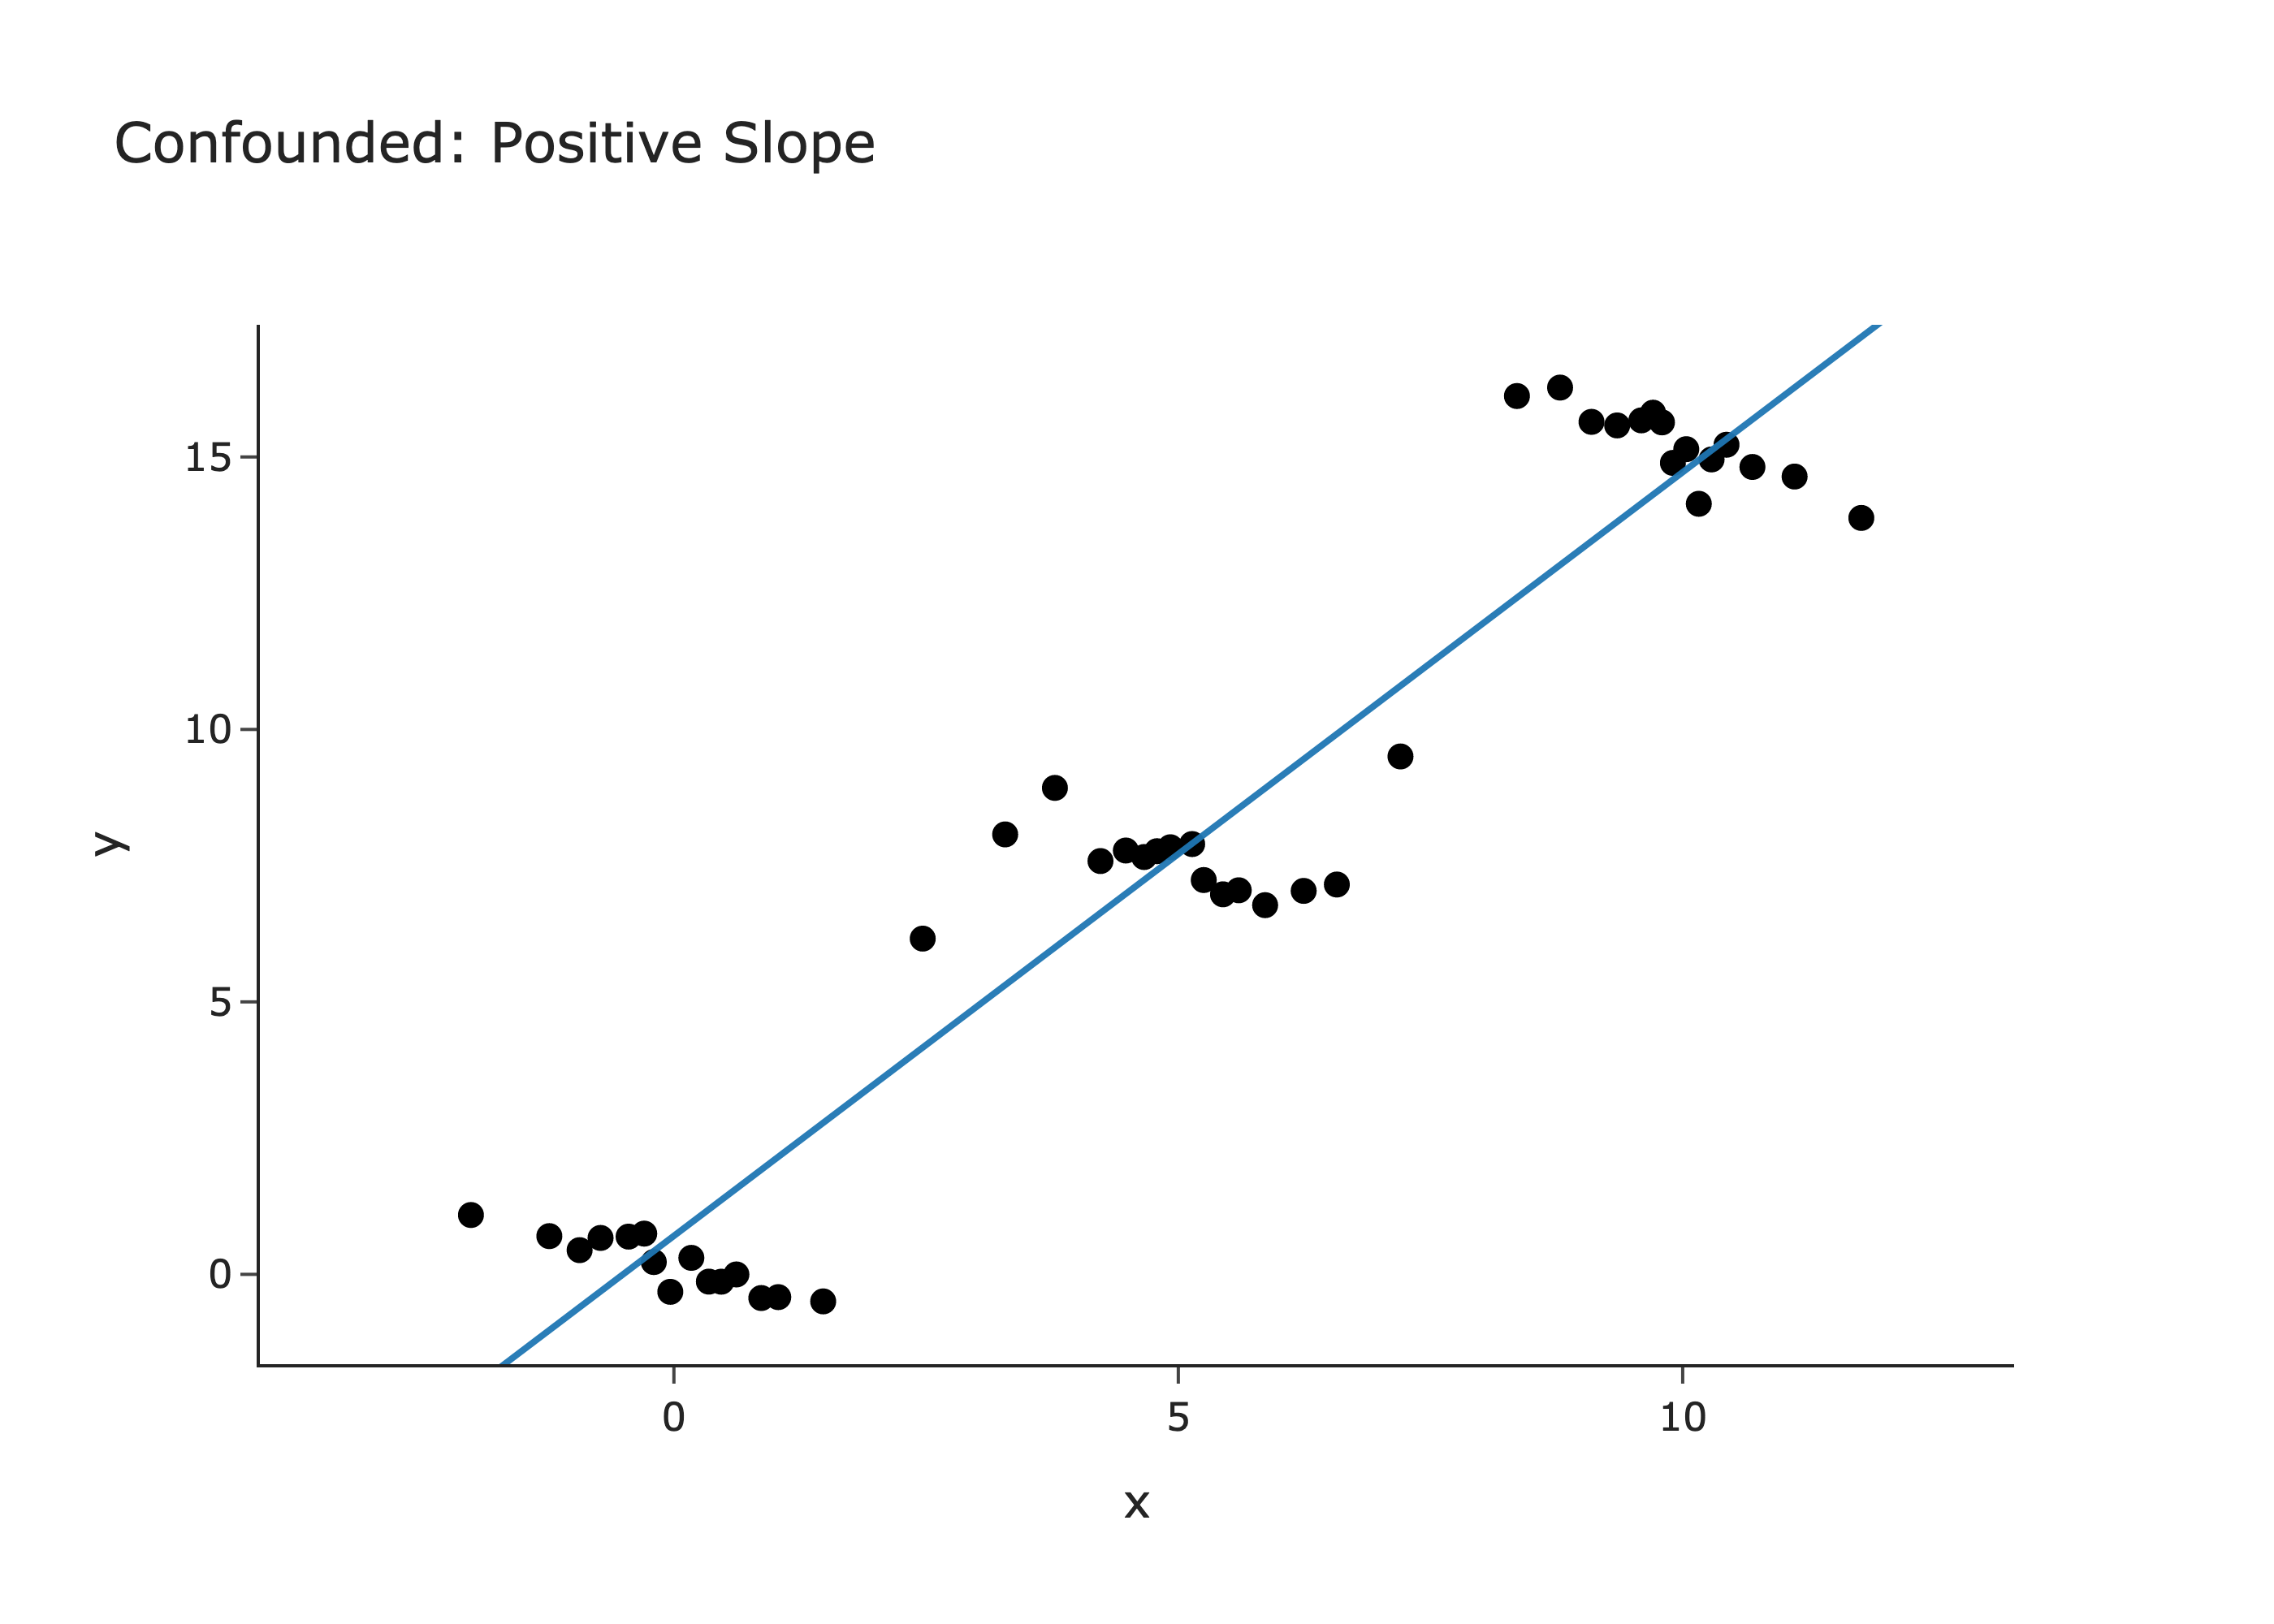

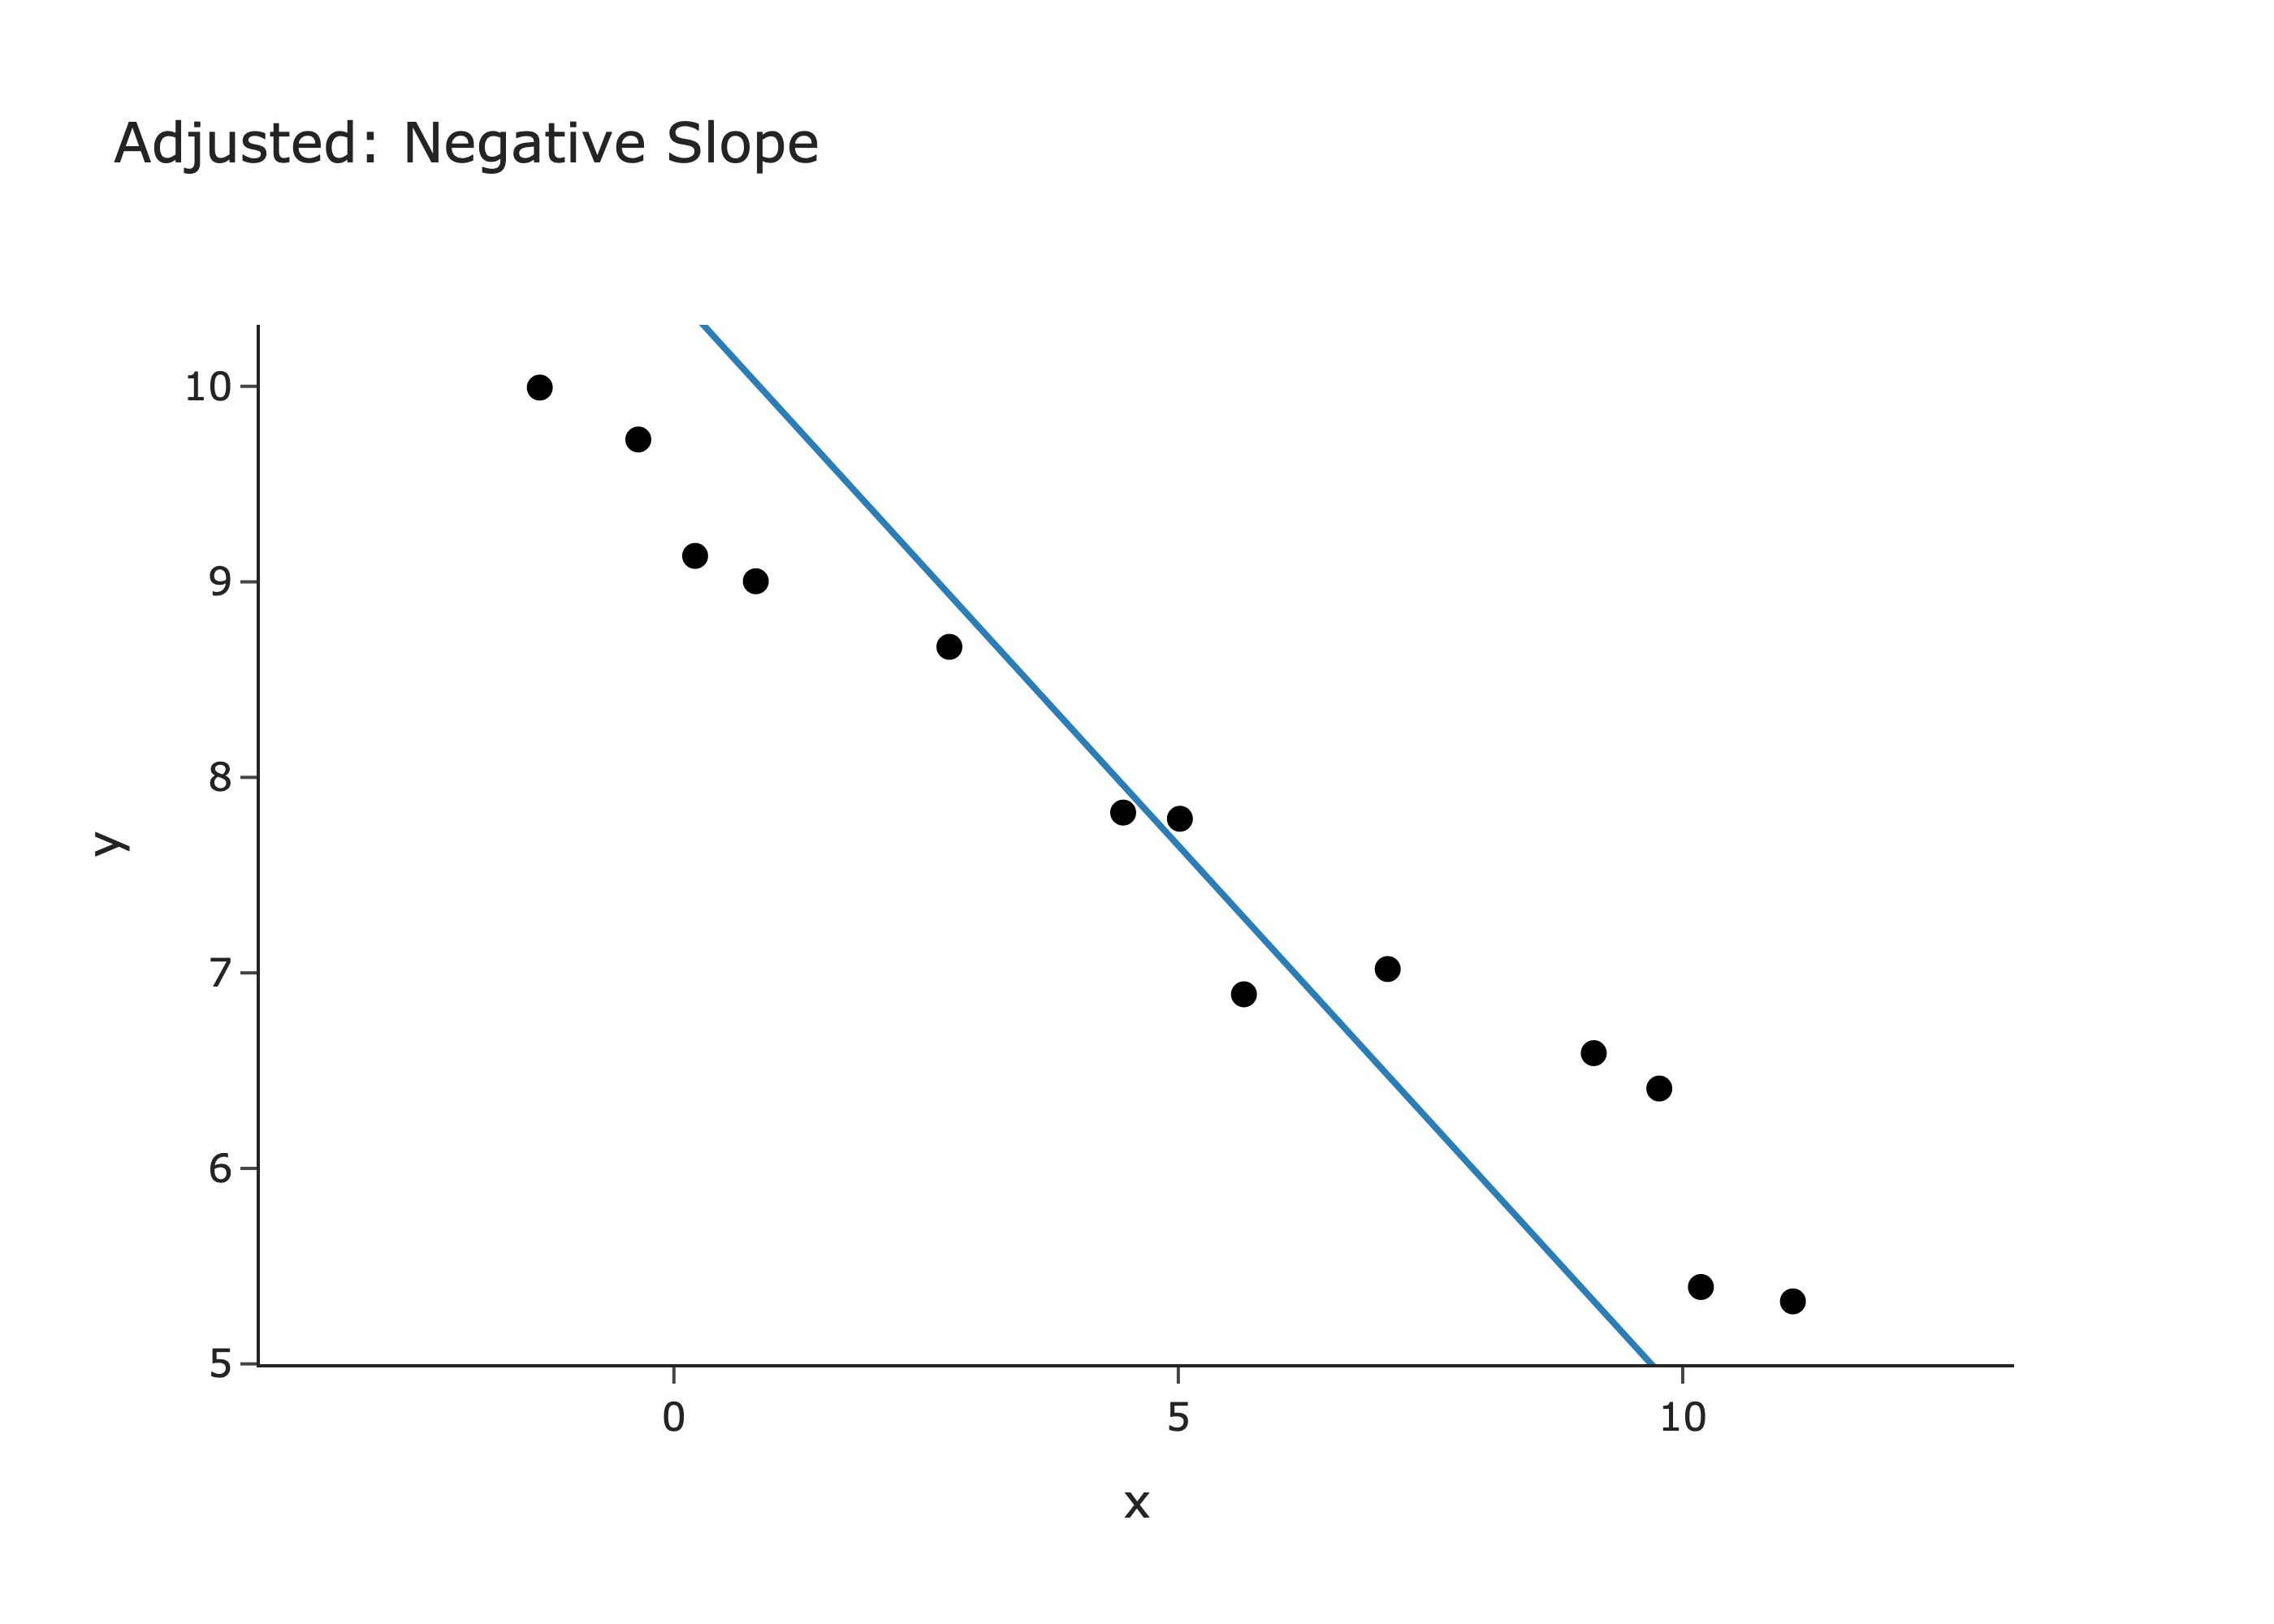

In [6]:
# Without controls - positive relationship (confounded)
binscatter(confounded_data, x="x", y="y", poly_line=1, title="Confounded: Positive Slope").show()

# Adjusting for group - reveals negative relationship
binscatter(confounded_data, x="x", y="y", controls="group", poly_line=1, title="Adjusted: Negative Slope").show()

## 6. Return Types

By default, binscatter returns a Plotly figure. Use `return_type="native"` to get the binned data as a dataframe—you get out what you put in.

In [7]:
# Return as native dataframe
df_binned = binscatter(gapminder, x="gdpPercap", y="lifeExp", return_type="native")
df_binned.head()

,bin,gdpPercap,lifeExp
25,0,412.373526,42.819915
22,1,571.597773,43.849617
3,2,683.415600,46.301498
0,3,781.566014,45.168129
1,4,889.820568,46.947848


## 7. Custom Plotly Arguments

You can pass additional keyword arguments to customize the Plotly scatter plot.

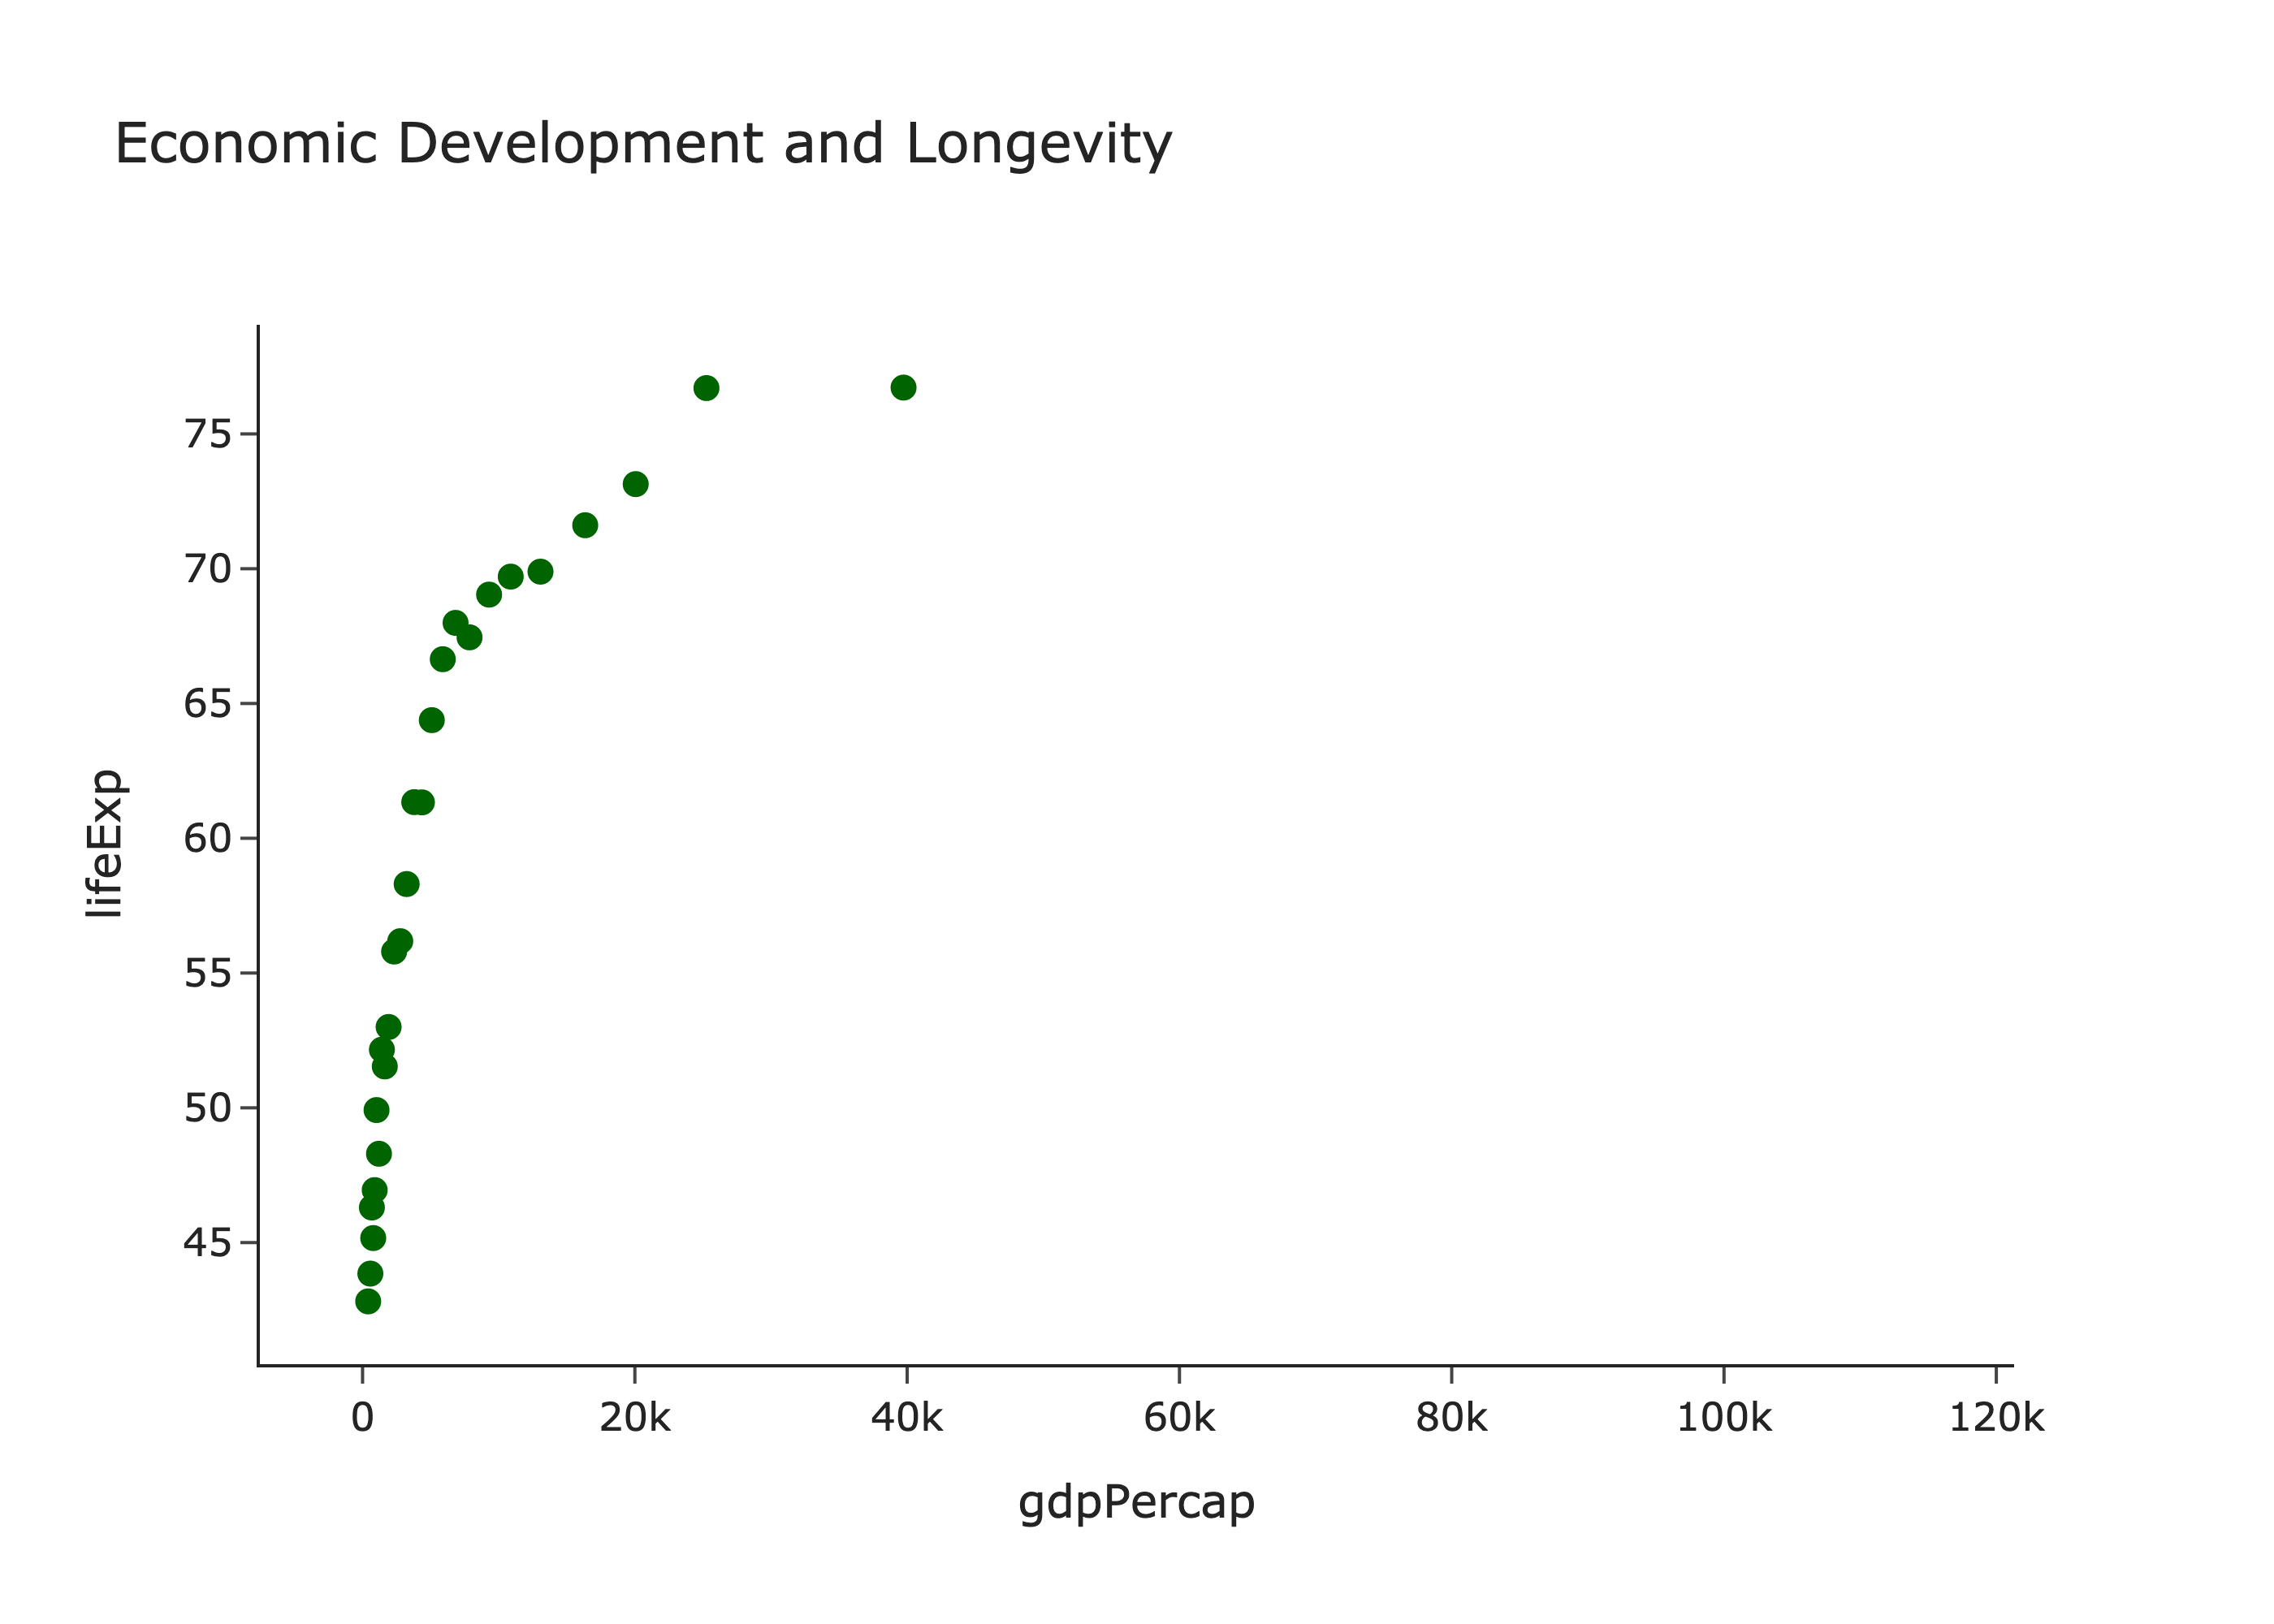

In [8]:
# Custom title and color
fig_custom = binscatter(
    gapminder,
    x="gdpPercap",
    y="lifeExp",
    title="Economic Development and Longevity",
    color_discrete_sequence=["darkgreen"],
)
fig_custom.show()

## 8. Backend Compatibility

Binscatter works with multiple dataframe backends thanks to the narwhals abstraction layer.

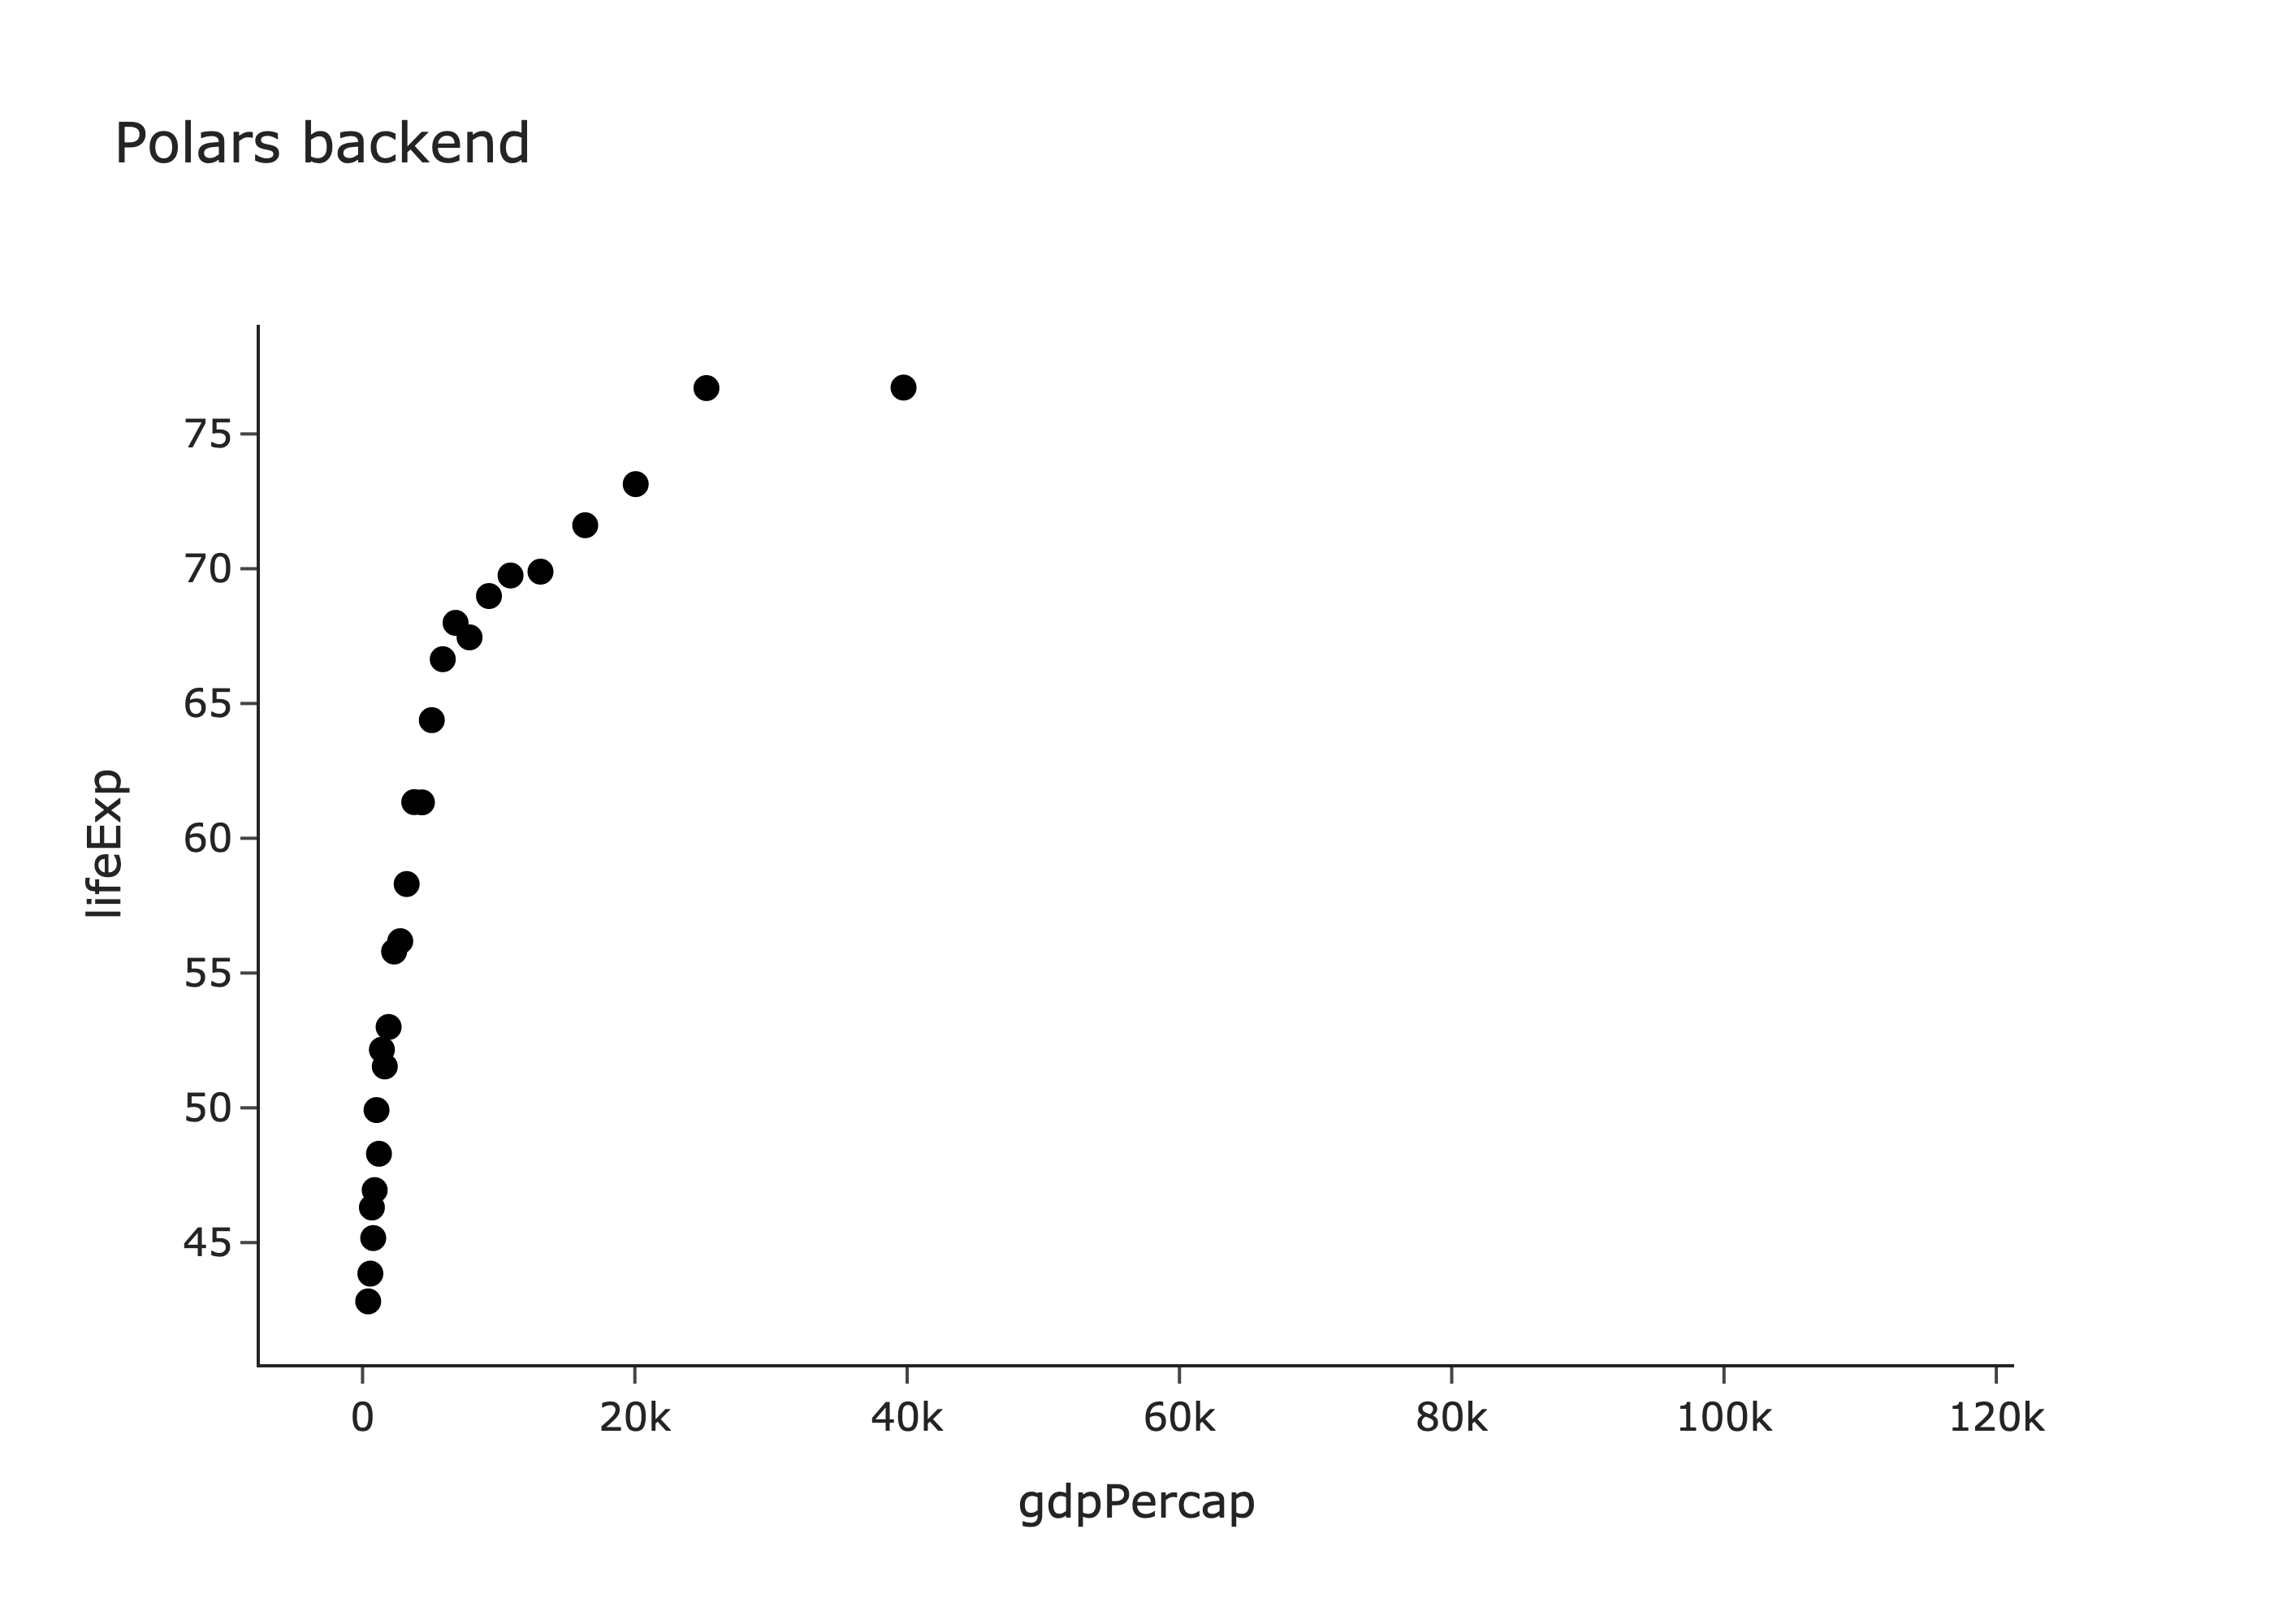

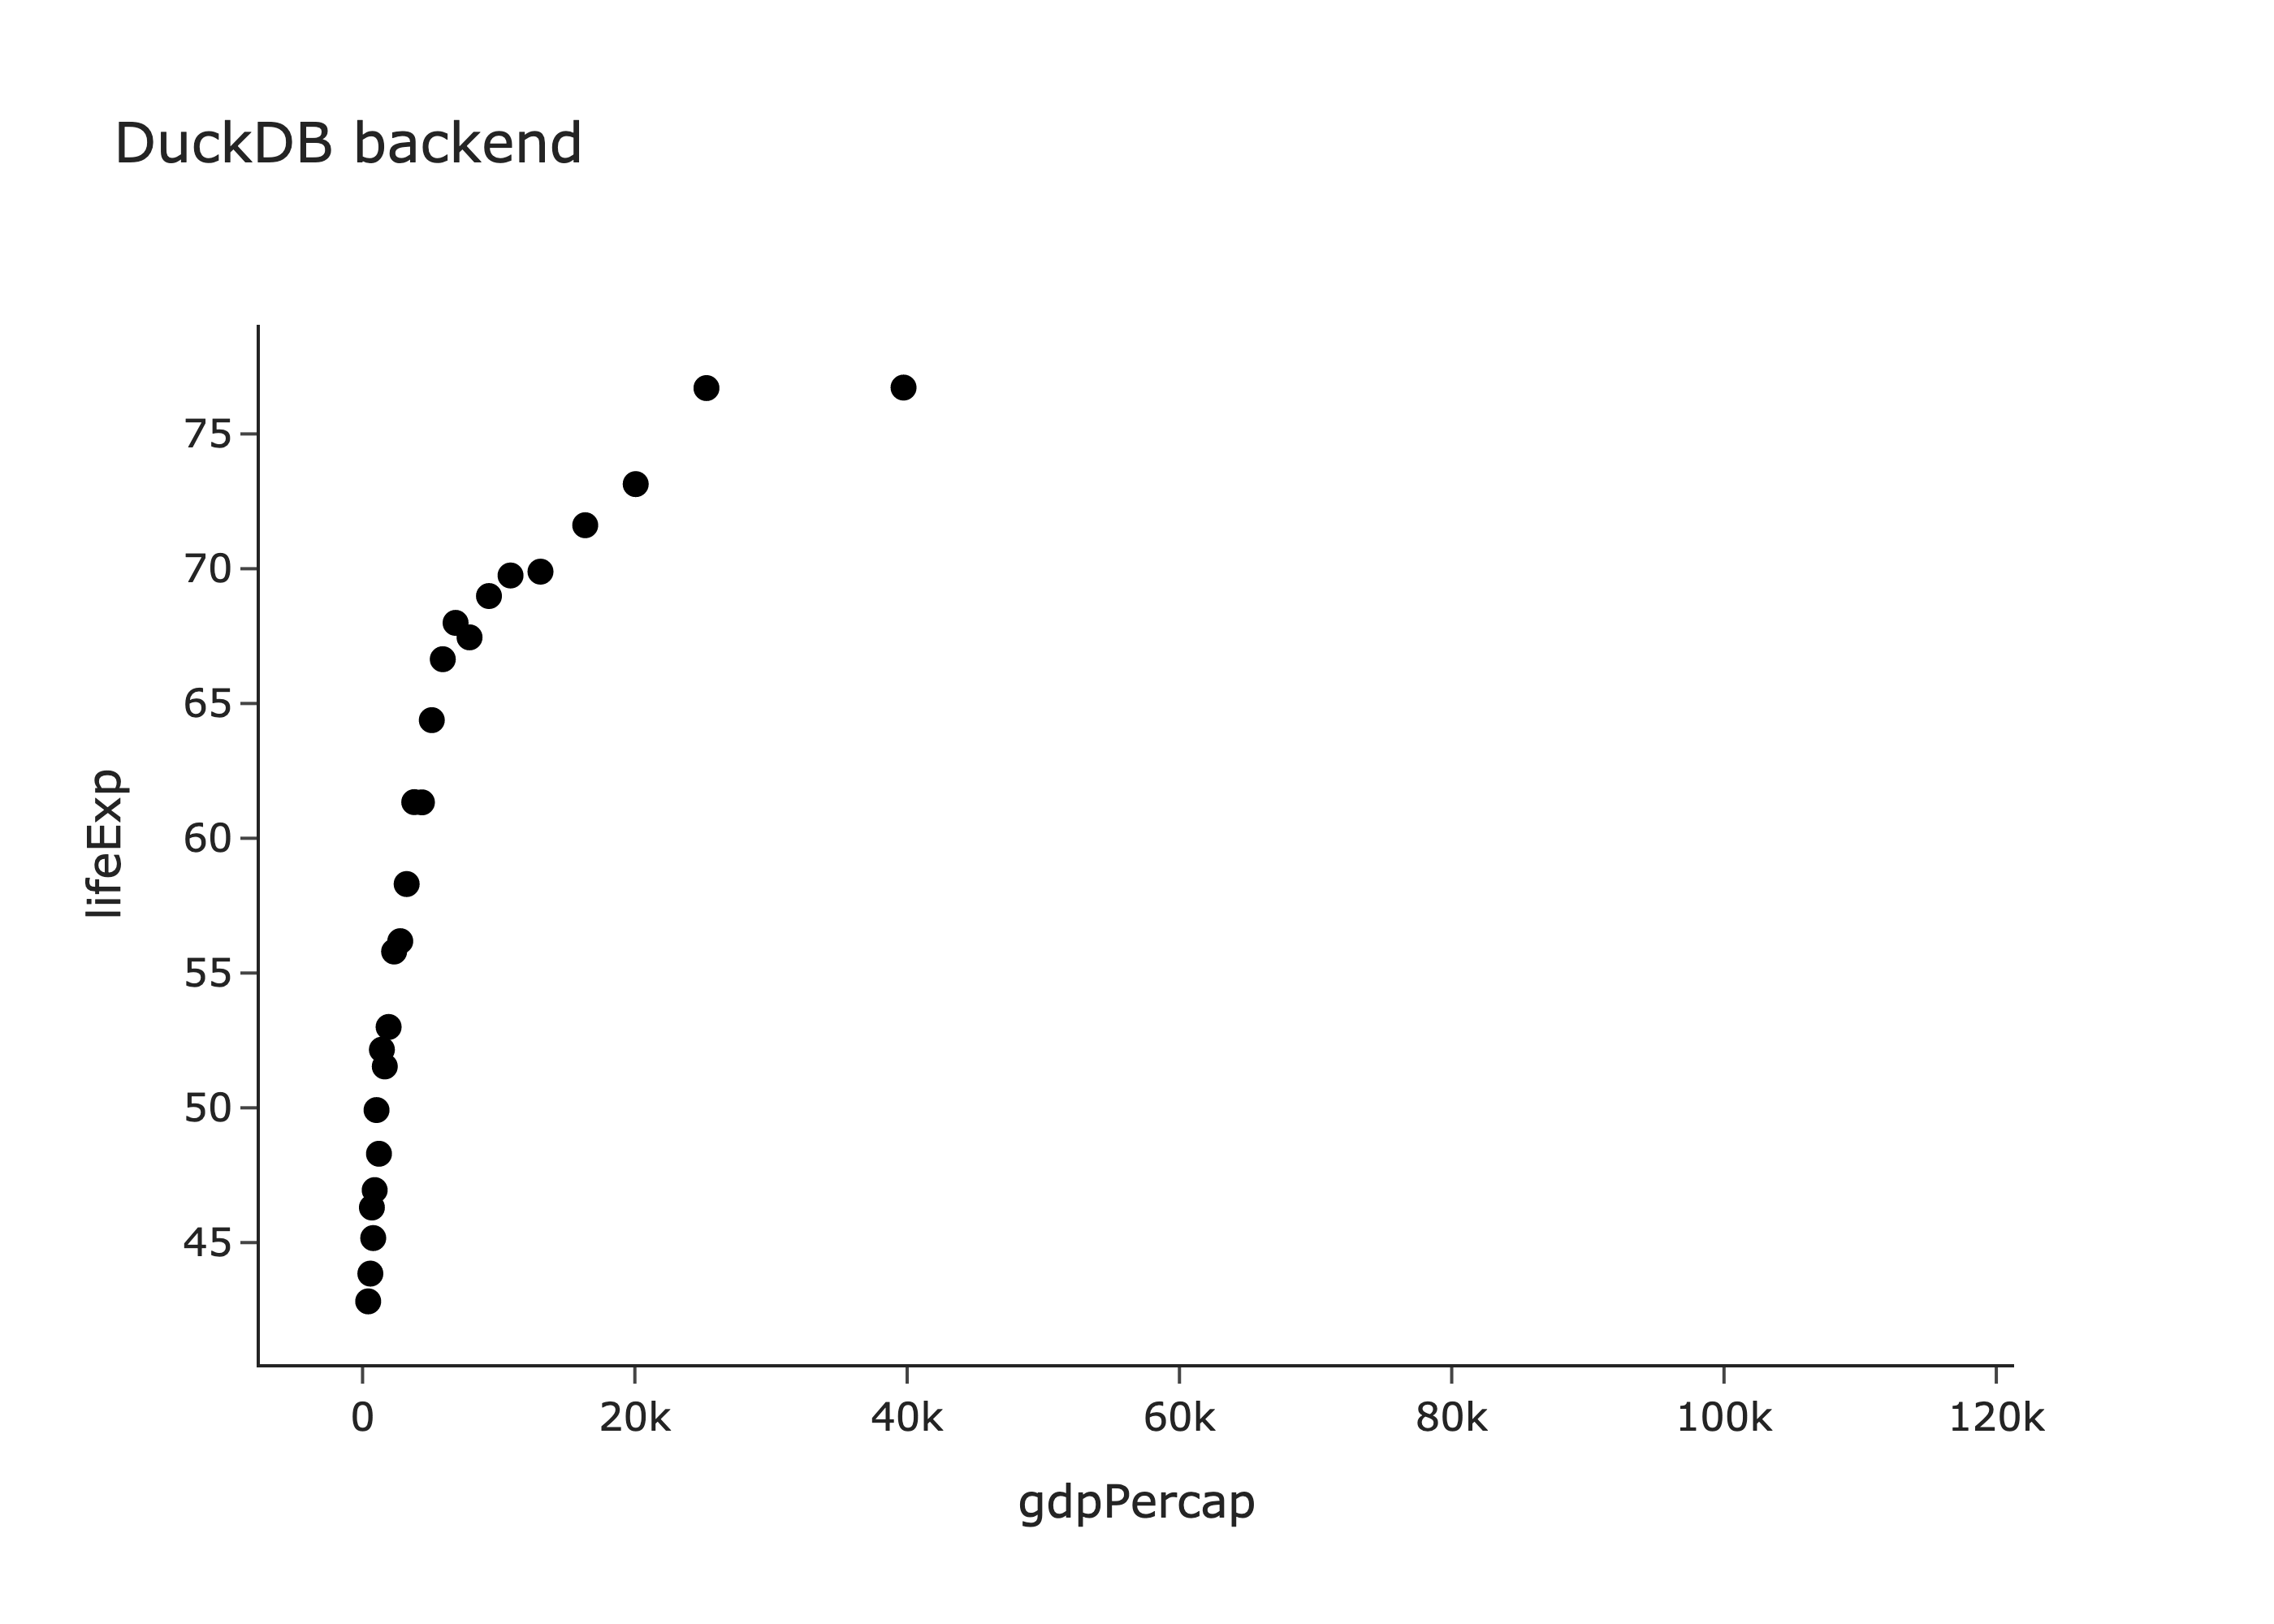

In [9]:
import polars as pl
import duckdb

# Polars
gapminder_pl = pl.from_pandas(gapminder)
binscatter(gapminder_pl, x="gdpPercap", y="lifeExp", title="Polars backend").show()

# DuckDB
gapminder_duck = duckdb.from_df(gapminder)
binscatter(gapminder_duck, x="gdpPercap", y="lifeExp", title="DuckDB backend").show()